# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

# Generating Data

In [3]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [4]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1','x2','target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


# Data Visualization

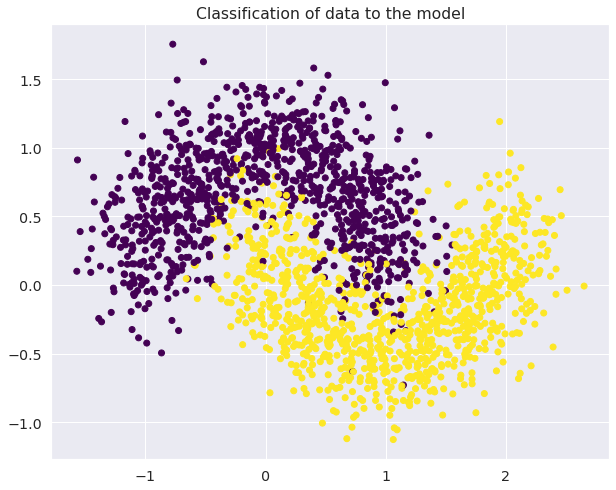

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.title('Classification of data to the model')
plt.show()

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.3)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1400, 2)
X_test shape: (600, 2)
y_train shape: (1400,)
y_test shape: (600,)


# Visualization Of The Training And Test Set

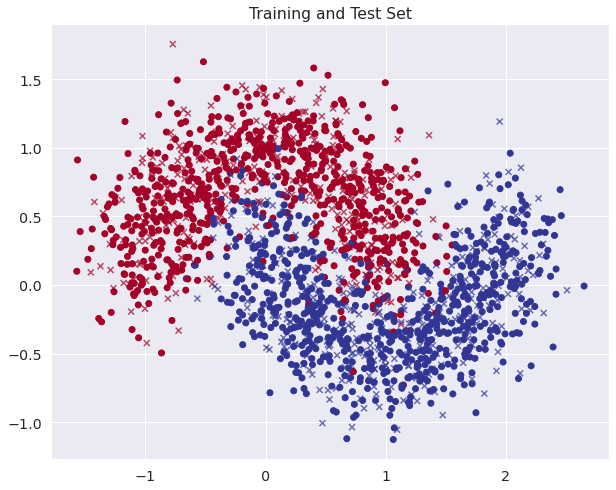

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap= 'RdYlBu',
            label ='Training Set')
plt.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap='RdYlBu', marker='x',
           alpha=0.7, label='Test Set')
plt.title('Training and Test Set')
plt.show()

# Underfitting - Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training Set

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



<function matplotlib.pyplot.show>

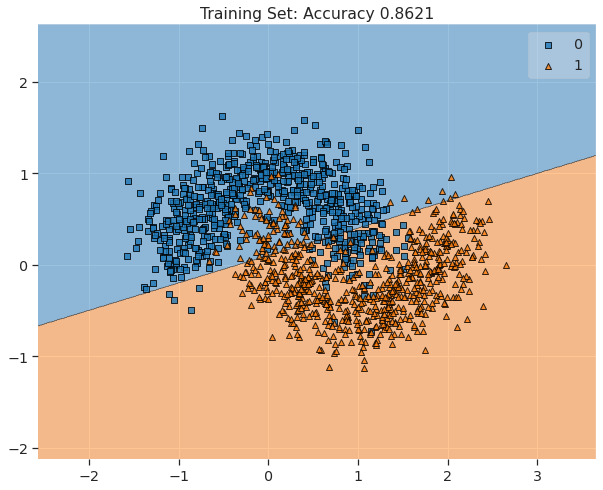

In [13]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Training Set: Accuracy {classifier.score(X_train,y_train):.4f}')
plt.show

Test Set

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



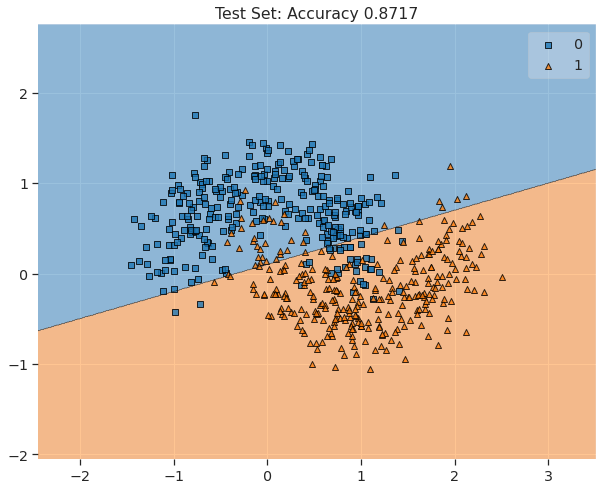

In [14]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Test Set: Accuracy {classifier.score(X_test, y_test):.4f}')
plt.show()

# Underfitting - Decision Tree

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



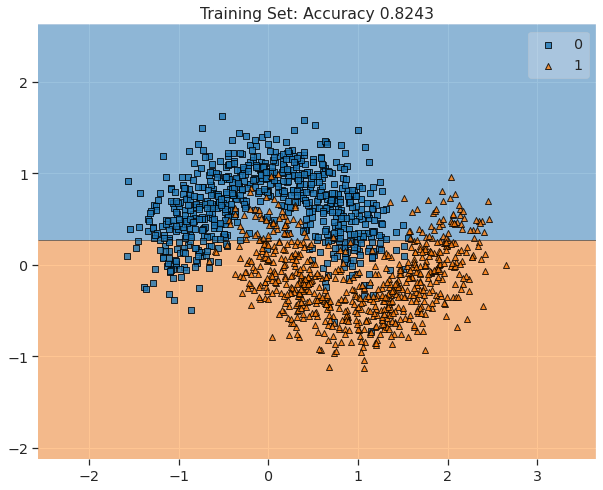

In [16]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Training Set: Accuracy {classifier.score(X_train, y_train):.4f}')
plt.show()

Test Set

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



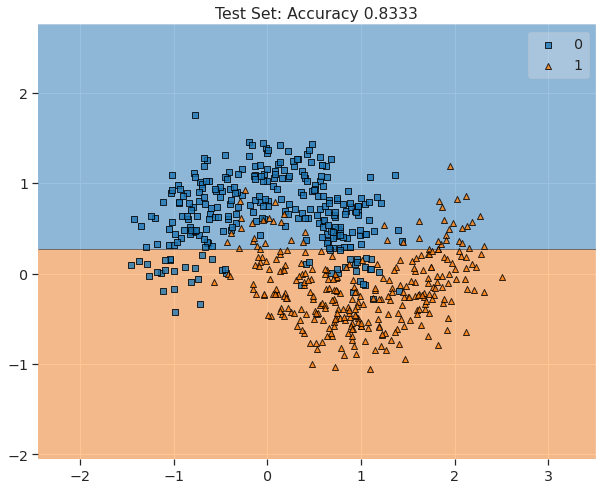

In [17]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Test Set: Accuracy {classifier.score(X_test, y_test):.4f}')
plt.show()

# Example: Overfitting

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



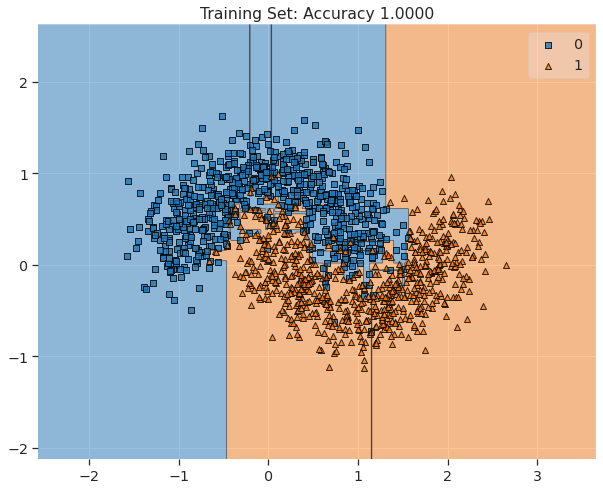

In [18]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,  y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Training Set: Accuracy {classifier.score(X_train, y_train):.4f}')
plt.show()

Test Set

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



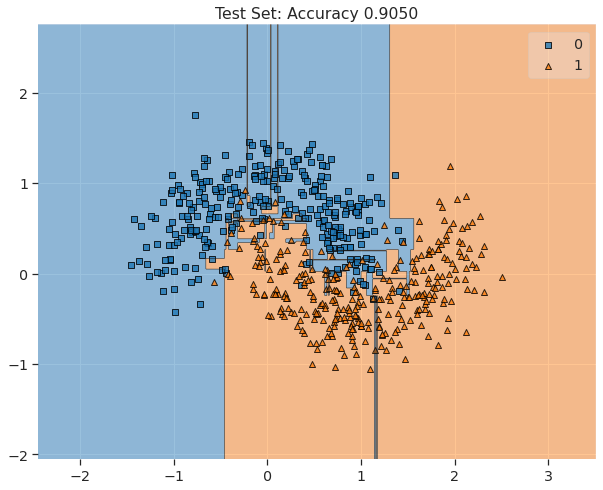

In [19]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Test Set: Accuracy {classifier.score(X_test, y_test):.4f}')
plt.show()